# Term Project latex link - https://www.overleaf.com/15365598rbgjznpqzrzt#/58214338/

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier



# one-hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#xgboost
import xgboost as xgb

#bayesian optimization
from bayes_opt import BayesianOptimization

#garbage collection
import gc

# for saving models
import pickle

# for plotting of confusion matrices
from sklearn.metrics import confusion_matrix
import itertools

#neural network Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping  
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import time

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


# Import Data

In [2]:
import os
os.getcwd()

train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

# Exploratory Analysis

In [3]:
print("Training examples are",len(train_df))
print("Test data is",len(test_df))
print("The columns are",train_df.columns.values)

Training examples are 891
Test data is 418
The columns are ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the first 5 rows
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Data cleaning

combined_data = train_df.append(test_df)

combined_data.Age.fillna(value=combined_data.Age.mean(), inplace=True)
combined_data.Fare.fillna(value=combined_data.Fare.mean(), inplace=True)
combined_data.Embarked.fillna(value=(combined_data.Embarked.value_counts().idxmax()), inplace=True)
combined_data.Survived.fillna(value=-1, inplace=True) 

# drop columns that are not needed
combined_data.drop('Name', axis=1, inplace=True)
combined_data.drop('Cabin', axis=1, inplace=True)
combined_data.drop('Ticket', axis=1, inplace=True)
combined_data.drop('Embarked', axis=1, inplace=True)

In [6]:
# Write cleaned data out

train = combined_data[combined_data['Survived']!=-1]
# train.to_csv("./Data/train-clean.csv")

test = combined_data[combined_data['Survived']==-1]
test.drop('Survived', axis=1, inplace=True)
# test.to_csv("./Data/test-clean.csv")


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [7]:
# One-hot encoding
train_encoded = pd.get_dummies(train, columns = ['Sex'])
test_encoded = pd.get_dummies(test, columns = ['Sex'])

# Rearrange columns
list_of_features = ['Age','Fare','Parch','Sex_female','Sex_male','SibSp']
list_of_columns = list_of_features + ['Survived']
train_encoded = train_encoded[list_of_columns]
test_encoded = test_encoded[list_of_features]

# Transform training and testing data into np arrays
train_x = train_encoded[list_of_features].values
test_x = test_encoded[list_of_features].values
train_y = train_encoded['Survived'].values

print(list_of_columns)

['Age', 'Fare', 'Parch', 'Sex_female', 'Sex_male', 'SibSp', 'Survived']


In [8]:
#collect some trash
gc.collect()

45

# Accuracy Evaluators

In [9]:
"""
This cell defines functions to compute the performance of any given model.
"""

def compute_f1(model, X, y,k_folds):
    """
    Given a model and the evaluation data, returns the F1 score.
    """
    return np.mean(cross_val_score(model, X, y, cv=k_folds, scoring='f1_weighted'))

def accuracy(model, X, y,k_folds):
    """
    Given a model and the evaluation data, returns the accuracy
    score evaluated using cross validation.
    """
    return np.mean(cross_val_score(model, X, y, cv=k_folds, scoring='accuracy'))

def print_score_model(model,train_x,train_y, k_folds):
    print("F1 score is",compute_f1(model,train_x,train_y,k_folds))
    print("Accuracy is",accuracy(model,train_x,train_y,k_folds))

# Different Model Definitions

In [10]:
def dtree(max_depth=None):
    # Decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth)
    return clf

def dtree_adaboost(n_estimators = 50):
    # Single layer decision trees with AdaBoost
    single_tree = dtree(max_depth=1)
    clf = AdaBoostClassifier(single_tree, algorithm='SAMME', n_estimators= n_estimators)
    return clf

def random_forest():
    #Random forest classifier
    clf = RandomForestClassifier(n_estimators=100)
    return clf

def SVM(kernel, degree=3, C=1.0, gamma='auto'):
    # Support vector machines
    clf = svm.SVC(kernel=kernel, degree=degree, C=C, gamma=gamma)
    return clf

def kNN(n_neighbor=3):
    # k nearest neighbours
    clf = KNeighborsClassifier(n_neighbor)
    return clf

def xgboost(max_depth=3, n_estimators=200, learning_rate=0.05):
    #gradient boosting for decision trees
    clf = xgb.XGBClassifier(max_depth = max_depth, 
                            n_estimators = n_estimators, 
                            learning_rate=learning_rate)
    return clf

# MLP

In [12]:
def create_mlp():
   clf = MLPClassifier(solver='sgd', alpha=1e-5, random_state=1,
                       early_stopping = True, learning_rate = 'adaptive',
                       learning_rate_init = 1e-4)
   return clf

def run_k_fold_mlp(features, labels, num_folds=5):
    clf = create_mlp()
    scores = cross_val_score(clf, features, labels, cv=num_folds)        
    return scores

def grid_search_mlp(features, labels, num_folds=5):
    parameters = {'solver':('sgd','adam','lbfgs'),
                  'activation':('identity', 'logistic', 'tanh', 'relu'),
                  'alpha':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
                  'learning_rate_init':[1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2],
                  'learning_rate':('constant', 'adaptive', 'invscaling')}
    mlp= MLPClassifier(early_stopping = True)
    clf = GridSearchCV(mlp, parameters, cv=num_folds)
    cv_results = clf.fit(features, labels).cv_results_

    # Collate results
    mean_test_score = cv_results['mean_test_score'].tolist()
    params = cv_results['params']
    best_test_score_idx = mean_test_score.index(max(mean_test_score))
    
    return mean_test_score[best_test_score_idx], params[best_test_score_idx]


In [13]:
start = time.time()
print(grid_search_mlp(train_x,train_y,5))
end = time.time()
print(end - start)

(0.8080808080808081, {'activation': 'logistic', 'alpha': 0.001, 'learning_rate': 'invscaling', 'learning_rate_init': 1e-06, 'solver': 'lbfgs'})
1456.851313829422


In [16]:
mlp_tuned = MLPClassifier(activation = 'logistic', solver='lbfgs', alpha=0.001, random_state=1,
                          early_stopping = True, learning_rate = 'invscaling',
                          learning_rate_init = 1e-06)

In [17]:
mlp_tuned.fit(train_x,train_y)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='invscaling',
       learning_rate_init=1e-06, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
#Adaboost

predictions = mlp_tuned.predict(test_x)
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
                            'Survived': predictions })
submission.to_csv("mlp.csv", 
                  index=False)

# 0.0 Logistic Regression

In [76]:
start = time.time()
logistic_regression_model = LogisticRegression()
print_score_model(logistic_regression_model,train_x,train_y,10)
end = time.time()
print(end - start)
logistic_regression_model.fit(train_x,train_y)

F1 score is 0.786988243645
Accuracy is 0.790132221087
0.08629417419433594


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# 0.1 kNN

In [72]:
knn_model = kNN(3)
print_score_model(knn_model,train_x,train_y,10)
knn_model.fit(train_x,train_y)

F1 score is 0.719810544843
Accuracy is 0.72410225854


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# 0.2 Random Forest

In [65]:
randomforest_model = random_forest()
print_score_model(randomforest_model,train_x,train_y,10)

F1 score is 0.81374865731
Accuracy is 0.809359323573


# 0.3 Adaboost

In [74]:
adaboosted_model = dtree_adaboost(e)
print_score_model(adaboosted_model,train_x,train_y,10)
adaboosted_model.fit(train_x,train_y)

F1 score is 0.789856384786
Accuracy is 0.791356259221


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

# 1. XGBoost

In [67]:
xgboost_model = xgboost(max_depth=3, 
                        n_estimators=300, 
                        learning_rate=0.05).fit(train_x, train_y)
print_score_model(xgboost_model, train_x, train_y, 10)

F1 score is 0.825289484397
Accuracy is 0.827224775848


# Bayesian Optimization on XGBoost

In [68]:
def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha):

    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)


    cv_result = xgb.cv(params, xgtrain, num_boost_round=num_rounds, nfold=5,
             seed=random_state,
             callbacks=[xgb.callback.early_stop(10)])

    return -cv_result['test-mae-mean'].values[-1]

num_rounds = 3000
random_state = 2016
num_iter = 25
init_points = 5
params = {
        'eta': 0.1,
        'silent': 1,
        'eval_metric': 'mae',
        'verbose_eval': True,
        'seed': random_state}
    
xgtrain = xgb.DMatrix(train_x, label=train_y)

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                                'colsample_bytree': (0.1, 1),
                                                'max_depth': (0, 15),
                                                'subsample': (0.5, 1),
                                                'gamma': (0, 10),
                                                'alpha': (0, 10),
                                                })
xgbBO.maximize(init_points=init_points, n_iter=num_iter)

Initialization
---------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[96]	train-mae:0.396608+0.00498	test-mae:0.398111+0.00874543

    1 | 00m01s |   -0.39811 |    7.8772 |             0.9587 |    5.3540 |      7.4250 |             2.9227 |      0.5324 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[90]	train-mae:0.362848+0.00436844	test-mae:0.368699+0.00774363

    2 | 00m00s |   -0.36870 |    0.9008 |             0.8102 |    5.1850 |      2.9072 |             1.5099 |      0.9560 | 
Multiple eval metrics hav

/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00019197]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[151]	train-mae:0.473295+0.00274958	test-mae:0.473646+0.00377031

   20 | 00m14s |   -0.47365 |    9.5244 |             0.8257 |    0.1530 |      0.5590 |             1.6991 |      0.6825 | 


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -3.94664560e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[246]	train-mae:0.2959+0.00555601	test-mae:0.308512+0.00729588

   21 | 00m18s |   -0.30851 |    9.9885 |             0.2724 |    0.1129 |     14.4539 |             1.0537 |      0.7565 | 


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -2.06054410e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[102]	train-mae:0.129887+0.00514447	test-mae:0.252965+0.0149328

   22 | 00m19s |   -0.25296 |    0.0914 |             0.1420 |    0.0682 |      6.5575 |             1.9435 |      0.8628 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[68]	train-mae:0.177992+0.00363329	test-mae:0.261678+0.0149299

   23 | 00m19s |   -0.26168 |    0.0000 |             0.1000 |    0.0000 |      6.0112 |             5.2923 |      1.0000 | 


/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00011598]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[78]	train-mae:0.140637+0.00458577	test-mae:0.254911+0.01333

   24 | 00m24s |   -0.25491 |    0.0000 |             0.1000 |    0.0000 |      6.0311 |             1.0000 |      1.0000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[68]	train-mae:0.090042+0.00662761	test-mae:0.25577+0.0160027

   25 | 00m22s |   -0.25577 |    0.0000 |             0.1000 |    0.0000 |     10.5178 |             2.3652 |      1.0000 | 
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
Stopping. Best iteration:
[106]	train-mae:0.475908+0.00250691	test-mae:0.476234+0.00335549

   26 | 00m14s |   -0.47623 |   10.0000 |             1.00

Parameters are given by:
Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 

In [69]:
xgb_tuned = xgb.XGBClassifier(reg_alpha = 4.1764, 
                              colsample_bytree = 1, 
                              gamma=0,
                              max_depth = 9, 
                              min_child_weight=19.7516,
                              subsample =1.00,
                              n_estimators=200, 
                              learning_rate=0.05)


0.0001010894775390625


In [70]:
start = time.time()

print_score_model(xgb_tuned, train_x, train_y, 10)
xgb_tuned.fit(train_x,train_y)
end = time.time()
print(end - start)

F1 score is 0.782991024969
Accuracy is 0.785612019067
4.771490812301636


In [16]:
#collect some trash
gc.collect()

277

# 2. Confusion matrices¶

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    title = title + '.png'
    plt.show()
#     plt.savefig(title, format='png')

In [18]:
def generate_confusion_matrix(y_val, y_pred, plot_title, list_classes=['survive','don\'t survive']):
    '''
    takes in y_val (ground truth for validation set), y_pred (predicted values for validation set),
    plot_title (name of plot), list_classes (['survive', 'dont survive'])
    '''
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_val, y_pred)
    plot_confusion_matrix(cnf_matrix, classes=list_classes, normalize=True,
                              title= plot_title)

# 3. SVM

In [19]:
# Linear SVM with parameters obtained from bayesian optimization in MATLAB
linear_svm_model = svm.SVC(kernel='linear', C=60.397)

In [20]:
print_score_model(linear_svm_model, train_x, train_y, 10)

F1 score is 0.789923734302
Accuracy is 0.792328907048


# 4. Random Forest¶


... Running random forest with 20 trees ...
Model training completed
20 trees (1st fold) Out-of-bag (accuracy) estimate: 0.811797752809


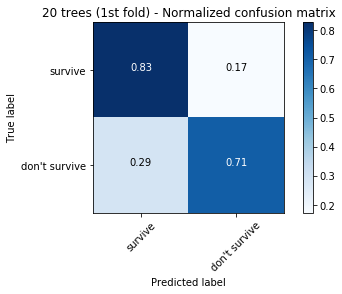

Model training completed
20 trees (2nd fold) Out-of-bag (accuracy) estimate: 0.797752808989


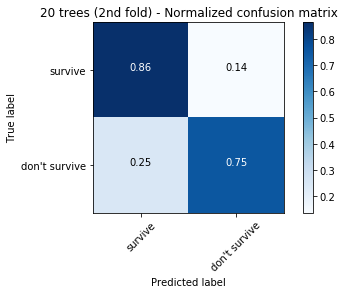

Model training completed
20 trees (3rd fold) Out-of-bag (accuracy) estimate: 0.798036465638


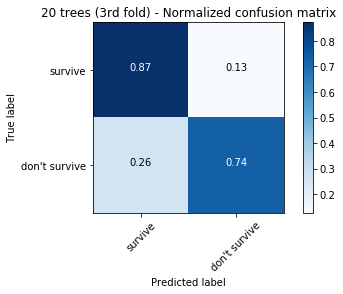

Model training completed
20 trees (4th fold) Out-of-bag (accuracy) estimate: 0.79523141655


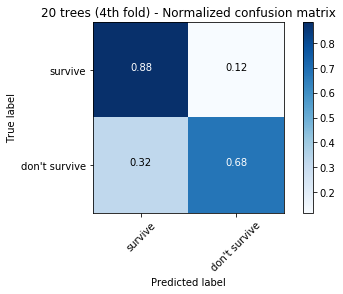

Model training completed
20 trees (5th fold) Out-of-bag (accuracy) estimate: 0.799719887955


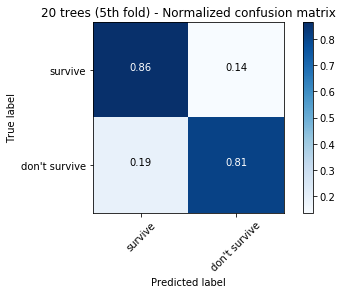

... Running random forest with 30 trees ...
Model training completed
30 trees (1st fold) Out-of-bag (accuracy) estimate: 0.808988764045


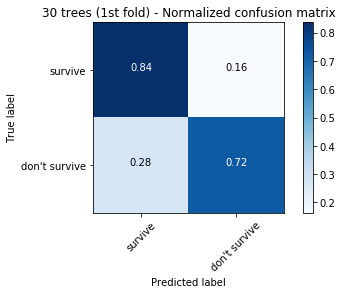

Model training completed
30 trees (2nd fold) Out-of-bag (accuracy) estimate: 0.801966292135


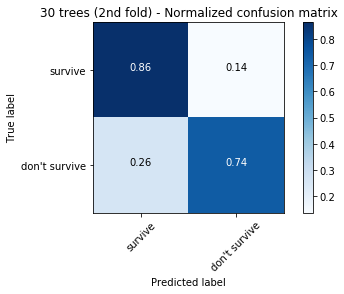

Model training completed
30 trees (3rd fold) Out-of-bag (accuracy) estimate: 0.791023842917


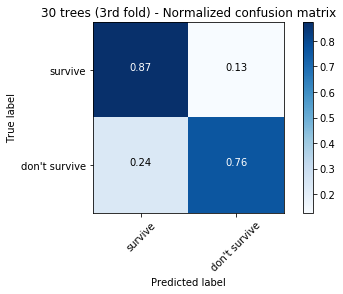

Model training completed
30 trees (4th fold) Out-of-bag (accuracy) estimate: 0.810659186536


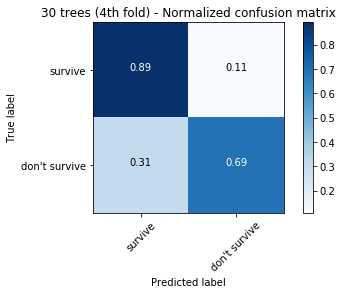

Model training completed
30 trees (5th fold) Out-of-bag (accuracy) estimate: 0.799719887955


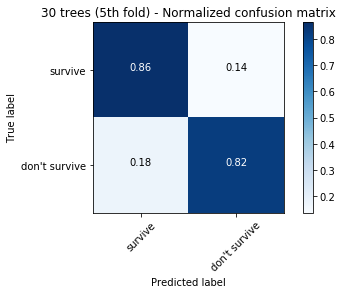

... Running random forest with 40 trees ...
Model training completed
40 trees (1st fold) Out-of-bag (accuracy) estimate: 0.818820224719


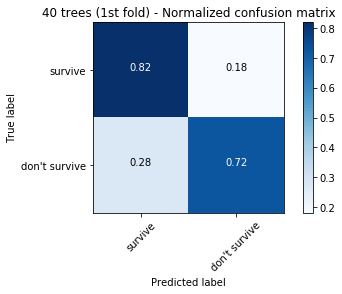

Model training completed
40 trees (2nd fold) Out-of-bag (accuracy) estimate: 0.801966292135


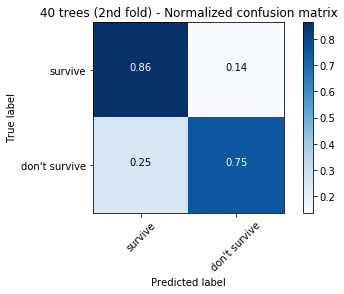

Model training completed
40 trees (3rd fold) Out-of-bag (accuracy) estimate: 0.789621318373


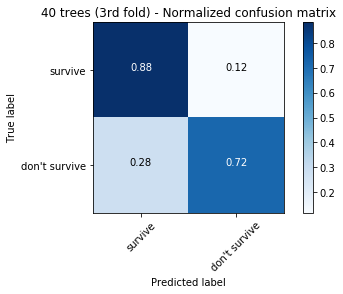

Model training completed
40 trees (4th fold) Out-of-bag (accuracy) estimate: 0.79523141655


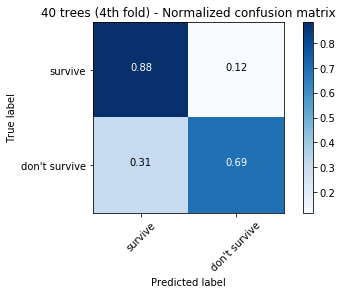

Model training completed
40 trees (5th fold) Out-of-bag (accuracy) estimate: 0.799719887955


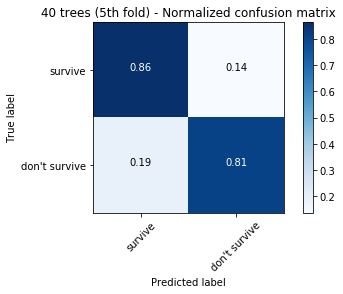

... Running random forest with 50 trees ...
Model training completed
50 trees (1st fold) Out-of-bag (accuracy) estimate: 0.813202247191


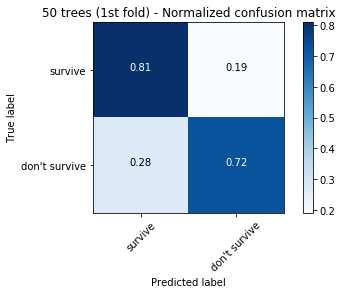

Model training completed
50 trees (2nd fold) Out-of-bag (accuracy) estimate: 0.803370786517


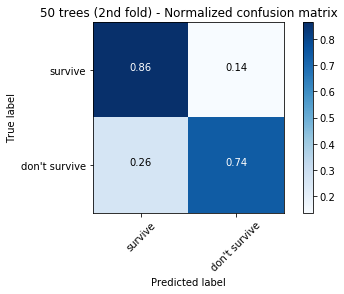

Model training completed
50 trees (3rd fold) Out-of-bag (accuracy) estimate: 0.792426367461


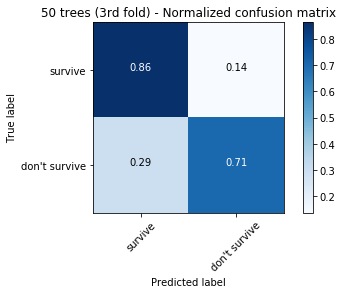

Model training completed
50 trees (4th fold) Out-of-bag (accuracy) estimate: 0.81206171108


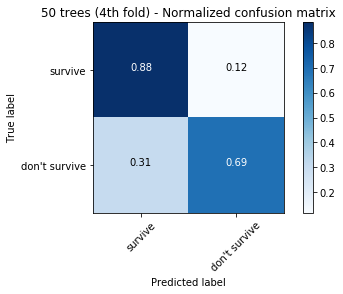

Model training completed
50 trees (5th fold) Out-of-bag (accuracy) estimate: 0.801120448179


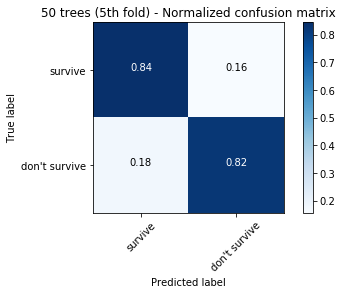

... Running random forest with 60 trees ...
Model training completed
60 trees (1st fold) Out-of-bag (accuracy) estimate: 0.807584269663


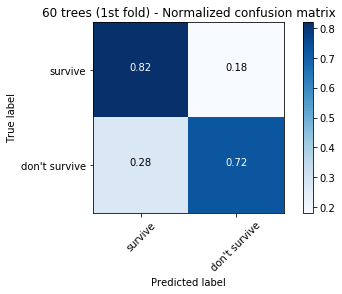

Model training completed
60 trees (2nd fold) Out-of-bag (accuracy) estimate: 0.814606741573


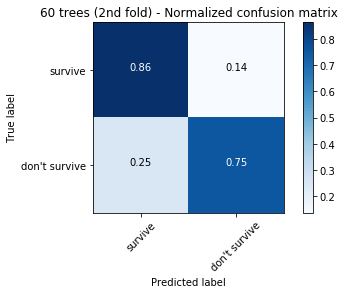

Model training completed
60 trees (3rd fold) Out-of-bag (accuracy) estimate: 0.791023842917


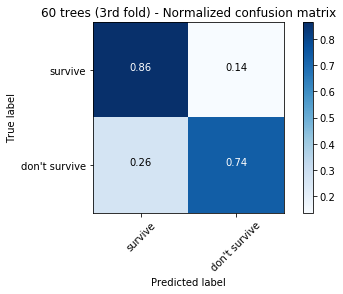

Model training completed
60 trees (4th fold) Out-of-bag (accuracy) estimate: 0.807854137447


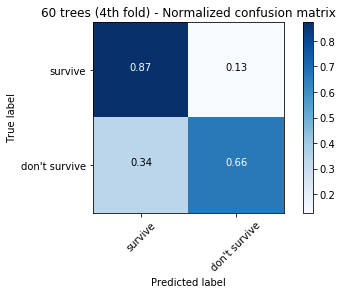

Model training completed
60 trees (5th fold) Out-of-bag (accuracy) estimate: 0.796918767507


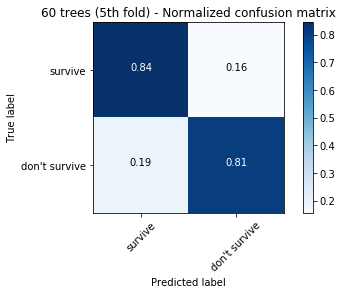

In [21]:
def random_forest(X_train, y_train, num_trees):
    rf = RandomForestClassifier(n_estimators = num_trees, random_state=0, oob_score = True, criterion='gini')
    rf.fit(X_train, y_train)
    return rf
  
def k_fold_rf(X, y, num_trees, num_folds=5):
    kf = StratifiedKFold(n_splits=5)
    i = 1
    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # For printing purposes
        if i == 1:
            rf_title = str(num_trees) + ' trees (1st fold)'
        elif i == 2:
            rf_title = str(num_trees) + ' trees (2nd fold)'
        elif i == 3:
            rf_title = str(num_trees) + ' trees (3rd fold)'
        else:
            rf_title = str(num_trees) + ' trees (' + str(i) + 'th fold)'

        # Obtained trained model using this set of training data
        model = random_forest(X_train, y_train, num_trees)
        print('Model training completed')

#         # save the model to disk
#         filename = 'finalized_model-' + str(num_trees) + '-trees-' + str(i) + '-fold' + '.sav'
#         pickle.dump(model, open(filename, 'wb'))
        
        # Report ooberror
        print(rf_title + ' Out-of-bag (accuracy) estimate: ' + str(model.oob_score_))

        # Run model on validation data
        y_pred = model.predict(X_val)

        # Compute and plot normalized confusion matrix
        plot_title = rf_title + ' - Normalized confusion matrix'
        generate_confusion_matrix(y_val, y_pred, plot_title)
        
        # set index for next fold
        i += 1

def run_rf_diff_trees(X, y, num_folds=5):
    param_trees = [20,30,40,50,60]
    for num_trees in param_trees:
        print('... Running random forest with ' + str(num_trees) + ' trees ...')
        k_fold_rf(X, y, num_trees, 5)

run_rf_diff_trees(train_x, train_y, 5)

# 5. CNN

In [79]:
def create_model(optimizer='adam', init='uniform'):
 # create model
    if verbose: print("**Create model with optimizer: %s; init: %s" % (optimizer, init) )
    model = Sequential()
    model.add(Dense(16, input_dim=X.shape[1], kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(4, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [ ]:
#Grid Search (couldn't find much info about Bayesian Optimization on CNN for Python)

print("GridSearch started") 
optimizers = ['rmsprop', 'adam','Adagrad']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [20, 50, 100, 200, 400]
batches = [2, 4, 8, 16, 32]
verbose = 1
model = KerasClassifier(build_fn=create_model, verbose=verbose)

param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
if verbose: 
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    elapsed_time = time.time() - start_time  
    print ("Time elapsed: ",timedelta(seconds=elapsed_time))

best_epochs = grid_result.best_params_['epochs']
best_batch_size = grid_result.best_params_['batch_size']
best_init = grid_result.best_params_['init']
best_optimizer = grid_result.best_params_['optimizer']

GridSearch started
**Create model with optimizer: rmsprop; init: glorot_uniform
Epoch 1/20
594/594 [==============================] - 0s 550us/step - loss: 1.4617 - acc: 0.4377
Epoch 2/20
594/594 [==============================] - 0s 425us/step - loss: 0.7069 - acc: 0.7003
Epoch 3/20
594/594 [==============================] - 0s 401us/step - loss: 0.6699 - acc: 0.7054
Epoch 4/20
594/594 [==============================] - 0s 361us/step - loss: 0.6553 - acc: 0.7037
Epoch 5/20
594/594 [==============================] - 0s 372us/step - loss: 0.6482 - acc: 0.7155
Epoch 6/20
594/594 [==============================] - 0s 434us/step - loss: 0.6379 - acc: 0.7138
Epoch 7/20
594/594 [==============================] - 0s 398us/step - loss: 0.6271 - acc: 0.7189
Epoch 8/20
594/594 [==============================] - 0s 408us/step - loss: 0.6163 - acc: 0.7155
Epoch 9/20
594/594 [==============================] - 0s 705us/step - loss: 0.6072 - acc: 0.7239
Epoch 10/20
594/594 [==========================

594/594 [==============================] - 0s 348us/step - loss: 0.5500 - acc: 0.6936
Epoch 15/20
594/594 [==============================] - 0s 387us/step - loss: 0.5438 - acc: 0.7020
Epoch 16/20
594/594 [==============================] - 0s 251us/step - loss: 0.5467 - acc: 0.6970
Epoch 17/20
594/594 [==============================] - 0s 255us/step - loss: 0.5380 - acc: 0.7054
Epoch 18/20
594/594 [==============================] - 0s 220us/step - loss: 0.5438 - acc: 0.7054
Epoch 19/20
594/594 [==============================] - 0s 250us/step - loss: 0.5397 - acc: 0.7121
Epoch 20/20
594/594 [==============================] - 0s 108us/step
**Create model with optimizer: Adagrad; init: glorot_uniform
Epoch 1/20
594/594 [==============================] - 0s 253us/step - loss: 0.7403 - acc: 0.5606
Epoch 2/20
594/594 [==============================] - 0s 277us/step - loss: 0.6442 - acc: 0.6364
Epoch 3/20
594/594 [==============================] - 0s 276us/step - loss: 0.6324 - acc: 0.6498
Epo

594/594 [==============================] - 0s 311us/step - loss: 0.5510 - acc: 0.7239
Epoch 9/20
594/594 [==============================] - 0s 440us/step - loss: 0.5471 - acc: 0.7273
Epoch 10/20
594/594 [==============================] - 0s 578us/step - loss: 0.5444 - acc: 0.7340
Epoch 11/20
594/594 [==============================] - 0s 419us/step - loss: 0.5411 - acc: 0.7323
Epoch 12/20
594/594 [==============================] - 0s 269us/step - loss: 0.5381 - acc: 0.7391
Epoch 13/20
594/594 [==============================] - 0s 253us/step - loss: 0.5346 - acc: 0.7407
Epoch 14/20
594/594 [==============================] - 0s 272us/step - loss: 0.5318 - acc: 0.7424
Epoch 15/20
594/594 [==============================] - 0s 285us/step - loss: 0.5284 - acc: 0.7424
Epoch 16/20
594/594 [==============================] - 0s 305us/step - loss: 0.5270 - acc: 0.7441
Epoch 17/20
594/594 [==============================] - 0s 285us/step - loss: 0.5243 - acc: 0.7306
Epoch 18/20
594/594 [============

Epoch 5/20
594/594 [==============================] - 0s 246us/step - loss: 0.6230 - acc: 0.6919
Epoch 6/20
594/594 [==============================] - 0s 253us/step - loss: 0.6120 - acc: 0.7071
Epoch 7/20
594/594 [==============================] - 0s 250us/step - loss: 0.6030 - acc: 0.6987
Epoch 8/20
594/594 [==============================] - 0s 244us/step - loss: 0.5856 - acc: 0.7104 0s - loss: 0.5832 - acc: 0.71
Epoch 9/20
594/594 [==============================] - 0s 270us/step - loss: 0.5751 - acc: 0.7239
Epoch 10/20
594/594 [==============================] - 0s 264us/step - loss: 0.5620 - acc: 0.7256
Epoch 11/20
594/594 [==============================] - 0s 314us/step - loss: 0.5457 - acc: 0.7542
Epoch 12/20
594/594 [==============================] - 0s 300us/step - loss: 0.5262 - acc: 0.7778
Epoch 13/20
594/594 [==============================] - 0s 348us/step - loss: 0.5161 - acc: 0.7811
Epoch 14/20
594/594 [==============================] - 0s 336us/step - loss: 0.5061 - acc: 0.

Epoch 20/20
594/594 [==============================] - 0s 117us/step
**Create model with optimizer: rmsprop; init: glorot_uniform
Epoch 1/50
594/594 [==============================] - 0s 248us/step - loss: 0.7245 - acc: 0.5976
Epoch 2/50
594/594 [==============================] - 0s 302us/step - loss: 0.6325 - acc: 0.7054
Epoch 3/50
594/594 [==============================] - 0s 286us/step - loss: 0.6069 - acc: 0.7054
Epoch 4/50
594/594 [==============================] - 0s 312us/step - loss: 0.5873 - acc: 0.7155
Epoch 5/50
594/594 [==============================] - 0s 311us/step - loss: 0.5716 - acc: 0.7205
Epoch 6/50
594/594 [==============================] - 0s 305us/step - loss: 0.5597 - acc: 0.7357
Epoch 7/50
594/594 [==============================] - 0s 253us/step - loss: 0.5490 - acc: 0.7340
Epoch 8/50
594/594 [==============================] - 0s 252us/step - loss: 0.5318 - acc: 0.7525
Epoch 9/50
594/594 [==============================] - 0s 277us/step - loss: 0.5225 - acc: 0.75

594/594 [==============================] - 0s 309us/step - loss: 0.5125 - acc: 0.7407
Epoch 10/50
594/594 [==============================] - 0s 288us/step - loss: 0.5083 - acc: 0.7593
Epoch 11/50
594/594 [==============================] - 0s 320us/step - loss: 0.5005 - acc: 0.7643
Epoch 12/50
594/594 [==============================] - 0s 300us/step - loss: 0.4942 - acc: 0.7677
Epoch 13/50
594/594 [==============================] - 0s 312us/step - loss: 0.4870 - acc: 0.7643
Epoch 14/50
594/594 [==============================] - 0s 303us/step - loss: 0.4842 - acc: 0.7727
Epoch 15/50
594/594 [==============================] - 0s 320us/step - loss: 0.4711 - acc: 0.7845
Epoch 16/50
594/594 [==============================] - 0s 311us/step - loss: 0.4815 - acc: 0.7778
Epoch 17/50
594/594 [==============================] - 0s 314us/step - loss: 0.4759 - acc: 0.7862
Epoch 18/50
594/594 [==============================] - 0s 309us/step - loss: 0.4793 - acc: 0.7845
Epoch 19/50
594/594 [===========

594/594 [==============================] - 0s 347us/step - loss: 0.6456 - acc: 0.6717
Epoch 21/50
594/594 [==============================] - 0s 305us/step - loss: 0.6445 - acc: 0.6684
Epoch 22/50
594/594 [==============================] - 0s 261us/step - loss: 0.6425 - acc: 0.6734
Epoch 23/50
594/594 [==============================] - 0s 296us/step - loss: 0.6408 - acc: 0.6835
Epoch 24/50
594/594 [==============================] - 0s 273us/step - loss: 0.6387 - acc: 0.6818
Epoch 25/50
594/594 [==============================] - 0s 248us/step - loss: 0.6363 - acc: 0.6970
Epoch 26/50
594/594 [==============================] - 0s 300us/step - loss: 0.6335 - acc: 0.6902
Epoch 27/50
594/594 [==============================] - 0s 347us/step - loss: 0.6307 - acc: 0.7003
Epoch 28/50
594/594 [==============================] - 0s 416us/step - loss: 0.6278 - acc: 0.7020
Epoch 29/50
594/594 [==============================] - 0s 374us/step - loss: 0.6259 - acc: 0.7020
Epoch 30/50
594/594 [===========

594/594 [==============================] - 0s 273us/step - loss: 0.4662 - acc: 0.8047
Epoch 32/50
594/594 [==============================] - 0s 312us/step - loss: 0.4614 - acc: 0.8013
Epoch 33/50
594/594 [==============================] - 0s 335us/step - loss: 0.4638 - acc: 0.7980
Epoch 34/50
594/594 [==============================] - 0s 251us/step - loss: 0.4617 - acc: 0.8081
Epoch 35/50
594/594 [==============================] - 0s 248us/step - loss: 0.4584 - acc: 0.8047
Epoch 36/50
594/594 [==============================] - 0s 250us/step - loss: 0.4512 - acc: 0.7946
Epoch 37/50
594/594 [==============================] - 0s 242us/step - loss: 0.4531 - acc: 0.8030
Epoch 38/50
594/594 [==============================] - 0s 285us/step - loss: 0.4548 - acc: 0.8013
Epoch 39/50
594/594 [==============================] - 0s 329us/step - loss: 0.4543 - acc: 0.8114
Epoch 40/50
594/594 [==============================] - 0s 281us/step - loss: 0.4551 - acc: 0.7946
Epoch 41/50
594/594 [===========

594/594 [==============================] - 0s 298us/step - loss: 0.4292 - acc: 0.8013
Epoch 43/50
594/594 [==============================] - 0s 386us/step - loss: 0.4318 - acc: 0.7946
Epoch 44/50
594/594 [==============================] - 0s 445us/step - loss: 0.4278 - acc: 0.8013
Epoch 45/50
594/594 [==============================] - 0s 391us/step - loss: 0.4262 - acc: 0.8013
Epoch 46/50
594/594 [==============================] - 0s 398us/step - loss: 0.4231 - acc: 0.7997
Epoch 47/50
594/594 [==============================] - 0s 335us/step - loss: 0.4249 - acc: 0.8047
Epoch 48/50
594/594 [==============================] - 0s 600us/step - loss: 0.4219 - acc: 0.8047
Epoch 49/50
594/594 [==============================] - 0s 383us/step - loss: 0.4226 - acc: 0.8081
Epoch 50/50
594/594 [==============================] - 0s 63us/step
**Create model with optimizer: adam; init: normal
Epoch 1/50
594/594 [==============================] - 0s 321us/step - loss: 0.6856 - acc: 0.6313
Epoch 2/50
59

594/594 [==============================] - 0s 386us/step - loss: 0.6152 - acc: 0.6397
Epoch 3/50
594/594 [==============================] - 0s 322us/step - loss: 0.6058 - acc: 0.6397
Epoch 4/50
594/594 [==============================] - 0s 367us/step - loss: 0.5994 - acc: 0.6397
Epoch 5/50
594/594 [==============================] - 0s 321us/step - loss: 0.5945 - acc: 0.6397
Epoch 6/50
594/594 [==============================] - 0s 281us/step - loss: 0.5910 - acc: 0.6397
Epoch 7/50
594/594 [==============================] - 0s 353us/step - loss: 0.5873 - acc: 0.6397
Epoch 8/50
594/594 [==============================] - 0s 339us/step - loss: 0.5850 - acc: 0.6397
Epoch 9/50
594/594 [==============================] - 0s 363us/step - loss: 0.5823 - acc: 0.6397
Epoch 10/50
594/594 [==============================] - 0s 269us/step - loss: 0.5796 - acc: 0.6397
Epoch 11/50
594/594 [==============================] - 0s 280us/step - loss: 0.5773 - acc: 0.6397
Epoch 12/50
594/594 [==================

594/594 [==============================] - 0s 630us/step - loss: 0.4716 - acc: 0.7811
Epoch 14/50
594/594 [==============================] - 0s 590us/step - loss: 0.4789 - acc: 0.7879
Epoch 15/50
594/594 [==============================] - 0s 532us/step - loss: 0.4775 - acc: 0.7879
Epoch 16/50
594/594 [==============================] - 0s 415us/step - loss: 0.4759 - acc: 0.7946
Epoch 17/50
594/594 [==============================] - 0s 453us/step - loss: 0.4814 - acc: 0.7912
Epoch 18/50
594/594 [==============================] - 0s 448us/step - loss: 0.4707 - acc: 0.7896
Epoch 19/50
594/594 [==============================] - 0s 468us/step - loss: 0.4745 - acc: 0.7912
Epoch 20/50
594/594 [==============================] - 0s 431us/step - loss: 0.4715 - acc: 0.8030
Epoch 21/50
594/594 [==============================] - 0s 578us/step - loss: 0.4687 - acc: 0.7929
Epoch 22/50
594/594 [==============================] - 0s 662us/step - loss: 0.4708 - acc: 0.8047
Epoch 23/50
594/594 [===========

Epoch 44/50
594/594 [==============================] - 0s 320us/step - loss: 0.4853 - acc: 0.7912
Epoch 45/50
594/594 [==============================] - 0s 254us/step - loss: 0.4870 - acc: 0.7862
Epoch 46/50
594/594 [==============================] - 0s 468us/step - loss: 0.4727 - acc: 0.7912
Epoch 47/50
594/594 [==============================] - 0s 572us/step - loss: 0.4732 - acc: 0.7896
Epoch 48/50
594/594 [==============================] - 0s 454us/step - loss: 0.4774 - acc: 0.7980
Epoch 49/50
594/594 [==============================] - 0s 391us/step - loss: 0.4775 - acc: 0.7963
Epoch 50/50
594/594 [==============================] - 0s 98us/step
**Create model with optimizer: adam; init: uniform
Epoch 1/50
594/594 [==============================] - 0s 355us/step - loss: 0.6661 - acc: 0.6027
Epoch 2/50
594/594 [==============================] - 0s 409us/step - loss: 0.6077 - acc: 0.6027
Epoch 3/50
594/594 [==============================] - 0s 479us/step - loss: 0.5832 - acc: 0.6717
Ep

594/594 [==============================] - 0s 296us/step - loss: 0.6830 - acc: 0.6027
Epoch 4/50
594/594 [==============================] - 0s 282us/step - loss: 0.6816 - acc: 0.6027
Epoch 5/50
594/594 [==============================] - 0s 285us/step - loss: 0.6805 - acc: 0.6027
Epoch 6/50
594/594 [==============================] - 0s 294us/step - loss: 0.6797 - acc: 0.6027
Epoch 7/50
594/594 [==============================] - 0s 284us/step - loss: 0.6790 - acc: 0.6027
Epoch 8/50
594/594 [==============================] - 0s 285us/step - loss: 0.6784 - acc: 0.6027
Epoch 9/50
594/594 [==============================] - 0s 300us/step - loss: 0.6778 - acc: 0.6027
Epoch 10/50
594/594 [==============================] - 0s 256us/step - loss: 0.6774 - acc: 0.6027
Epoch 11/50
594/594 [==============================] - 0s 274us/step - loss: 0.6770 - acc: 0.6027
Epoch 12/50
594/594 [==============================] - 0s 283us/step - loss: 0.6766 - acc: 0.6027
Epoch 13/50
594/594 [=================

594/594 [==============================] - 0s 279us/step - loss: 0.4868 - acc: 0.7929
Epoch 16/100
594/594 [==============================] - 0s 289us/step - loss: 0.4949 - acc: 0.7811
Epoch 17/100
594/594 [==============================] - 0s 318us/step - loss: 0.4819 - acc: 0.7912
Epoch 18/100
594/594 [==============================] - 0s 269us/step - loss: 0.4803 - acc: 0.7828
Epoch 19/100
594/594 [==============================] - 0s 272us/step - loss: 0.4816 - acc: 0.7795
Epoch 20/100
594/594 [==============================] - 0s 267us/step - loss: 0.4939 - acc: 0.8013
Epoch 21/100
594/594 [==============================] - 0s 284us/step - loss: 0.4824 - acc: 0.7811
Epoch 22/100
594/594 [==============================] - 0s 283us/step - loss: 0.4852 - acc: 0.8165
Epoch 23/100
594/594 [==============================] - 0s 274us/step - loss: 0.4885 - acc: 0.7811
Epoch 24/100
594/594 [==============================] - 0s 287us/step - loss: 0.4674 - acc: 0.7929
Epoch 25/100
594/594 [=

594/594 [==============================] - 0s 306us/step - loss: 0.6538 - acc: 0.6397
Epoch 77/100
594/594 [==============================] - 0s 294us/step - loss: 0.6539 - acc: 0.6397
Epoch 78/100
594/594 [==============================] - 0s 303us/step - loss: 0.6539 - acc: 0.6397
Epoch 79/100
594/594 [==============================] - 0s 292us/step - loss: 0.6538 - acc: 0.6397
Epoch 80/100
594/594 [==============================] - 0s 302us/step - loss: 0.6538 - acc: 0.6397
Epoch 81/100
594/594 [==============================] - 0s 304us/step - loss: 0.6539 - acc: 0.6397
Epoch 82/100
594/594 [==============================] - 0s 297us/step - loss: 0.6539 - acc: 0.6397
Epoch 83/100
594/594 [==============================] - 0s 302us/step - loss: 0.6538 - acc: 0.6397
Epoch 84/100
594/594 [==============================] - 0s 324us/step - loss: 0.6539 - acc: 0.6397
Epoch 85/100
594/594 [==============================] - 0s 395us/step - loss: 0.6538 - acc: 0.6397
Epoch 86/100
594/594 [=

594/594 [==============================] - 0s 301us/step - loss: 0.4563 - acc: 0.8013
Epoch 38/100
594/594 [==============================] - 0s 314us/step - loss: 0.4473 - acc: 0.8165
Epoch 39/100
594/594 [==============================] - 0s 329us/step - loss: 0.4487 - acc: 0.8064
Epoch 40/100
594/594 [==============================] - 0s 312us/step - loss: 0.4468 - acc: 0.8081
Epoch 41/100
594/594 [==============================] - 0s 328us/step - loss: 0.4498 - acc: 0.8131
Epoch 42/100
594/594 [==============================] - 0s 309us/step - loss: 0.4470 - acc: 0.8165
Epoch 43/100
594/594 [==============================] - 0s 339us/step - loss: 0.4553 - acc: 0.8098
Epoch 44/100
594/594 [==============================] - 0s 314us/step - loss: 0.4518 - acc: 0.8030
Epoch 45/100
594/594 [==============================] - 0s 318us/step - loss: 0.4501 - acc: 0.8114
Epoch 46/100
594/594 [==============================] - 0s 323us/step - loss: 0.4509 - acc: 0.8182
Epoch 47/100
594/594 [=

594/594 [==============================] - 0s 158us/step
**Create model with optimizer: adam; init: glorot_uniform
Epoch 1/100
594/594 [==============================] - 0s 463us/step - loss: 0.7642 - acc: 0.5791
Epoch 2/100
594/594 [==============================] - 0s 481us/step - loss: 0.6825 - acc: 0.6027
Epoch 3/100
594/594 [==============================] - 0s 463us/step - loss: 0.6783 - acc: 0.6061
Epoch 4/100
594/594 [==============================] - 0s 638us/step - loss: 0.6757 - acc: 0.6061
Epoch 5/100
594/594 [==============================] - 0s 471us/step - loss: 0.6740 - acc: 0.6061
Epoch 6/100
594/594 [==============================] - 0s 580us/step - loss: 0.6729 - acc: 0.6061
Epoch 7/100
594/594 [==============================] - 0s 535us/step - loss: 0.6720 - acc: 0.6061
Epoch 8/100
594/594 [==============================] - 0s 455us/step - loss: 0.6716 - acc: 0.6061
Epoch 9/100
594/594 [==============================] - 0s 445us/step - loss: 0.6713 - acc: 0.6061
Epo

594/594 [==============================] - 0s 271us/step - loss: 0.4984 - acc: 0.7912
Epoch 62/100
594/594 [==============================] - 0s 283us/step - loss: 0.4968 - acc: 0.7929
Epoch 63/100
594/594 [==============================] - 0s 291us/step - loss: 0.4958 - acc: 0.8030
Epoch 64/100
594/594 [==============================] - 0s 274us/step - loss: 0.4937 - acc: 0.7980
Epoch 65/100
594/594 [==============================] - 0s 284us/step - loss: 0.4942 - acc: 0.7997
Epoch 66/100
594/594 [==============================] - 0s 369us/step - loss: 0.4944 - acc: 0.7980
Epoch 67/100
594/594 [==============================] - 0s 294us/step - loss: 0.4927 - acc: 0.7929
Epoch 68/100
594/594 [==============================] - 0s 409us/step - loss: 0.4924 - acc: 0.7997
Epoch 69/100
594/594 [==============================] - 0s 289us/step - loss: 0.4921 - acc: 0.8013
Epoch 70/100
594/594 [==============================] - 0s 259us/step - loss: 0.4912 - acc: 0.7946
Epoch 71/100
594/594 [=

594/594 [==============================] - 0s 648us/step - loss: 0.6009 - acc: 0.6953 0s - loss: 0.6198 - acc: 0.
Epoch 22/100
594/594 [==============================] - 0s 453us/step - loss: 0.5995 - acc: 0.7020
Epoch 23/100
594/594 [==============================] - 0s 568us/step - loss: 0.5984 - acc: 0.6970
Epoch 24/100
594/594 [==============================] - 0s 423us/step - loss: 0.5974 - acc: 0.7003
Epoch 25/100
594/594 [==============================] - 0s 395us/step - loss: 0.5962 - acc: 0.7003
Epoch 26/100
594/594 [==============================] - 0s 490us/step - loss: 0.5951 - acc: 0.6970
Epoch 27/100
594/594 [==============================] - 0s 566us/step - loss: 0.5940 - acc: 0.6987
Epoch 28/100
594/594 [==============================] - 0s 395us/step - loss: 0.5929 - acc: 0.6970
Epoch 29/100
594/594 [==============================] - 0s 693us/step - loss: 0.5911 - acc: 0.7020
Epoch 30/100
594/594 [==============================] - 0s 669us/step - loss: 0.5907 - acc: 0.

594/594 [==============================] - 0s 555us/step - loss: 0.4323 - acc: 0.8098
Epoch 84/100
594/594 [==============================] - 0s 656us/step - loss: 0.4353 - acc: 0.8148
Epoch 85/100
594/594 [==============================] - 1s 1ms/step - loss: 0.4365 - acc: 0.8148
Epoch 86/100
594/594 [==============================] - 1s 1ms/step - loss: 0.4296 - acc: 0.8316
Epoch 87/100
594/594 [==============================] - 0s 606us/step - loss: 0.4322 - acc: 0.8182
Epoch 88/100
594/594 [==============================] - 0s 497us/step - loss: 0.4333 - acc: 0.8182
Epoch 89/100
594/594 [==============================] - 0s 716us/step - loss: 0.4303 - acc: 0.8232
Epoch 90/100
594/594 [==============================] - 0s 440us/step - loss: 0.4340 - acc: 0.8215
Epoch 91/100
594/594 [==============================] - 0s 385us/step - loss: 0.4240 - acc: 0.8131
Epoch 92/100
594/594 [==============================] - 0s 363us/step - loss: 0.4272 - acc: 0.8148
Epoch 93/100
594/594 [=====

Epoch 64/100
594/594 [==============================] - 0s 635us/step - loss: 0.4586 - acc: 0.8013
Epoch 65/100
594/594 [==============================] - 0s 361us/step - loss: 0.4601 - acc: 0.7946
Epoch 66/100
594/594 [==============================] - 0s 368us/step - loss: 0.4610 - acc: 0.8047
Epoch 67/100
594/594 [==============================] - 0s 398us/step - loss: 0.4507 - acc: 0.8030
Epoch 68/100
594/594 [==============================] - 0s 490us/step - loss: 0.4635 - acc: 0.7845
Epoch 69/100
594/594 [==============================] - 0s 380us/step - loss: 0.4512 - acc: 0.8081
Epoch 70/100
594/594 [==============================] - 0s 324us/step - loss: 0.4591 - acc: 0.8030
Epoch 71/100
594/594 [==============================] - 0s 415us/step - loss: 0.4608 - acc: 0.8030
Epoch 72/100
594/594 [==============================] - 0s 323us/step - loss: 0.4693 - acc: 0.7997
Epoch 73/100
594/594 [==============================] - 0s 314us/step - loss: 0.4598 - acc: 0.8013
Epoch 74/1

594/594 [==============================] - 0s 415us/step - loss: 0.4801 - acc: 0.7912
Epoch 45/100
594/594 [==============================] - 0s 394us/step - loss: 0.4861 - acc: 0.7862 0s - loss: 0.3959 - acc: 0.84 - ETA: 0s - loss: 0.4339 - acc: 0.82
Epoch 46/100
594/594 [==============================] - 0s 332us/step - loss: 0.4763 - acc: 0.8013
Epoch 47/100
594/594 [==============================] - 0s 368us/step - loss: 0.4824 - acc: 0.7963
Epoch 48/100
594/594 [==============================] - 0s 414us/step - loss: 0.4899 - acc: 0.7963
Epoch 49/100
594/594 [==============================] - 0s 450us/step - loss: 0.4810 - acc: 0.8013
Epoch 50/100
594/594 [==============================] - 0s 350us/step - loss: 0.4867 - acc: 0.7912
Epoch 51/100
594/594 [==============================] - 0s 375us/step - loss: 0.4790 - acc: 0.8030
Epoch 52/100
594/594 [==============================] - 0s 410us/step - loss: 0.4822 - acc: 0.7997
Epoch 53/100
594/594 [==============================] -

594/594 [==============================] - 0s 338us/step - loss: 0.5264 - acc: 0.7071
Epoch 6/100
594/594 [==============================] - 0s 333us/step - loss: 0.5200 - acc: 0.7205
Epoch 7/100
594/594 [==============================] - 0s 326us/step - loss: 0.5103 - acc: 0.7441
Epoch 8/100
594/594 [==============================] - 0s 653us/step - loss: 0.5038 - acc: 0.7559
Epoch 9/100
594/594 [==============================] - 0s 323us/step - loss: 0.4878 - acc: 0.7795
Epoch 10/100
594/594 [==============================] - 0s 310us/step - loss: 0.4822 - acc: 0.7845
Epoch 11/100
594/594 [==============================] - 0s 405us/step - loss: 0.4708 - acc: 0.7929
Epoch 12/100
594/594 [==============================] - 0s 325us/step - loss: 0.4690 - acc: 0.7862
Epoch 13/100
594/594 [==============================] - 0s 320us/step - loss: 0.4681 - acc: 0.7997
Epoch 14/100
594/594 [==============================] - 0s 341us/step - loss: 0.4616 - acc: 0.7929
Epoch 15/100
594/594 [=====

594/594 [==============================] - 0s 312us/step - loss: 0.4666 - acc: 0.7879
Epoch 68/100
594/594 [==============================] - 0s 414us/step - loss: 0.4676 - acc: 0.7896
Epoch 69/100
594/594 [==============================] - 0s 446us/step - loss: 0.4602 - acc: 0.7997
Epoch 70/100
594/594 [==============================] - 0s 313us/step - loss: 0.4644 - acc: 0.7946
Epoch 71/100
594/594 [==============================] - 0s 310us/step - loss: 0.4633 - acc: 0.7845
Epoch 72/100
594/594 [==============================] - 0s 325us/step - loss: 0.4623 - acc: 0.7963
Epoch 73/100
594/594 [==============================] - 0s 316us/step - loss: 0.4633 - acc: 0.7980
Epoch 74/100
594/594 [==============================] - 0s 425us/step - loss: 0.4631 - acc: 0.7980
Epoch 75/100
594/594 [==============================] - 0s 313us/step - loss: 0.4662 - acc: 0.7912
Epoch 76/100
594/594 [==============================] - 0s 322us/step - loss: 0.4664 - acc: 0.7963
Epoch 77/100
594/594 [=

594/594 [==============================] - 0s 375us/step - loss: 0.6569 - acc: 0.6397
Epoch 29/100
594/594 [==============================] - 0s 293us/step - loss: 0.6567 - acc: 0.6397
Epoch 30/100
594/594 [==============================] - 0s 310us/step - loss: 0.6566 - acc: 0.6397
Epoch 31/100
594/594 [==============================] - 0s 386us/step - loss: 0.6565 - acc: 0.6397
Epoch 32/100
594/594 [==============================] - 0s 377us/step - loss: 0.6563 - acc: 0.6397
Epoch 33/100
594/594 [==============================] - 0s 324us/step - loss: 0.6562 - acc: 0.6397
Epoch 34/100
594/594 [==============================] - 0s 424us/step - loss: 0.6561 - acc: 0.6397
Epoch 35/100
594/594 [==============================] - 0s 408us/step - loss: 0.6560 - acc: 0.6397
Epoch 36/100
594/594 [==============================] - 0s 445us/step - loss: 0.6559 - acc: 0.6397
Epoch 37/100
594/594 [==============================] - 0s 336us/step - loss: 0.6558 - acc: 0.6397
Epoch 38/100
594/594 [=

594/594 [==============================] - 0s 381us/step - loss: 0.4805 - acc: 0.7912
Epoch 92/100
594/594 [==============================] - 0s 319us/step - loss: 0.4801 - acc: 0.7929
Epoch 93/100
594/594 [==============================] - 0s 309us/step - loss: 0.4796 - acc: 0.7929
Epoch 94/100
594/594 [==============================] - 0s 355us/step - loss: 0.4794 - acc: 0.7946
Epoch 95/100
594/594 [==============================] - 0s 385us/step - loss: 0.4796 - acc: 0.7896
Epoch 96/100
594/594 [==============================] - 0s 362us/step - loss: 0.4803 - acc: 0.7929
Epoch 97/100
594/594 [==============================] - 0s 382us/step - loss: 0.4797 - acc: 0.7929
Epoch 98/100
594/594 [==============================] - 0s 317us/step - loss: 0.4797 - acc: 0.7946
Epoch 99/100
594/594 [==============================] - 0s 460us/step - loss: 0.4795 - acc: 0.7946
Epoch 100/100
594/594 [==============================] - 0s 101us/step
**Create model with optimizer: rmsprop; init: unifo

594/594 [==============================] - 0s 452us/step - loss: 0.4572 - acc: 0.8081
Epoch 53/100
594/594 [==============================] - 0s 335us/step - loss: 0.4568 - acc: 0.8030
Epoch 54/100
594/594 [==============================] - 0s 429us/step - loss: 0.4594 - acc: 0.8030
Epoch 55/100
594/594 [==============================] - 0s 375us/step - loss: 0.4557 - acc: 0.8047
Epoch 56/100
594/594 [==============================] - 0s 491us/step - loss: 0.4517 - acc: 0.8013
Epoch 57/100
594/594 [==============================] - 0s 437us/step - loss: 0.4515 - acc: 0.8047
Epoch 58/100
594/594 [==============================] - 0s 402us/step - loss: 0.4561 - acc: 0.8030
Epoch 59/100
594/594 [==============================] - 0s 386us/step - loss: 0.4547 - acc: 0.8064
Epoch 60/100
594/594 [==============================] - 0s 419us/step - loss: 0.4527 - acc: 0.7997
Epoch 61/100
594/594 [==============================] - 0s 546us/step - loss: 0.4557 - acc: 0.8064
Epoch 62/100
594/594 [=

594/594 [==============================] - 0s 394us/step - loss: 0.4812 - acc: 0.7811
Epoch 14/100
594/594 [==============================] - 0s 323us/step - loss: 0.4797 - acc: 0.7929
Epoch 15/100
594/594 [==============================] - 0s 319us/step - loss: 0.4738 - acc: 0.7997
Epoch 16/100
594/594 [==============================] - 0s 429us/step - loss: 0.4712 - acc: 0.7963
Epoch 17/100
594/594 [==============================] - 0s 422us/step - loss: 0.4695 - acc: 0.7980
Epoch 18/100
594/594 [==============================] - 0s 391us/step - loss: 0.4663 - acc: 0.8013
Epoch 19/100
594/594 [==============================] - 0s 432us/step - loss: 0.4607 - acc: 0.7963
Epoch 20/100
594/594 [==============================] - 0s 341us/step - loss: 0.4642 - acc: 0.7980
Epoch 21/100
594/594 [==============================] - 0s 411us/step - loss: 0.4609 - acc: 0.7912
Epoch 22/100
594/594 [==============================] - 0s 377us/step - loss: 0.4636 - acc: 0.7929
Epoch 23/100
594/594 [=

Epoch 75/100
594/594 [==============================] - 1s 998us/step - loss: 0.4457 - acc: 0.8013
Epoch 76/100
594/594 [==============================] - 0s 716us/step - loss: 0.4488 - acc: 0.8064
Epoch 77/100
594/594 [==============================] - 0s 460us/step - loss: 0.4585 - acc: 0.8030
Epoch 78/100
594/594 [==============================] - 0s 744us/step - loss: 0.4543 - acc: 0.8114
Epoch 79/100
594/594 [==============================] - 0s 496us/step - loss: 0.4542 - acc: 0.8081
Epoch 80/100
594/594 [==============================] - 0s 498us/step - loss: 0.4510 - acc: 0.7980
Epoch 81/100
594/594 [==============================] - 0s 481us/step - loss: 0.4503 - acc: 0.8013
Epoch 82/100
594/594 [==============================] - 0s 708us/step - loss: 0.4477 - acc: 0.8064
Epoch 83/100
594/594 [==============================] - 0s 501us/step - loss: 0.4411 - acc: 0.8098
Epoch 84/100
594/594 [==============================] - 0s 501us/step - loss: 0.4459 - acc: 0.8098
Epoch 85/1

594/594 [==============================] - 0s 482us/step - loss: 0.5603 - acc: 0.7929
Epoch 33/100
594/594 [==============================] - 0s 471us/step - loss: 0.5567 - acc: 0.7929
Epoch 34/100
594/594 [==============================] - 0s 482us/step - loss: 0.5533 - acc: 0.7929
Epoch 35/100
594/594 [==============================] - 0s 619us/step - loss: 0.5510 - acc: 0.7879
Epoch 36/100
594/594 [==============================] - 1s 893us/step - loss: 0.5477 - acc: 0.7896
Epoch 37/100
594/594 [==============================] - 0s 572us/step - loss: 0.5451 - acc: 0.7929
Epoch 38/100
594/594 [==============================] - 0s 530us/step - loss: 0.5428 - acc: 0.7946
Epoch 39/100
594/594 [==============================] - 1s 1ms/step - loss: 0.5404 - acc: 0.7929
Epoch 40/100
594/594 [==============================] - 1s 888us/step - loss: 0.5389 - acc: 0.7929
Epoch 41/100
594/594 [==============================] - 0s 755us/step - loss: 0.5366 - acc: 0.7879
Epoch 42/100
594/594 [===

594/594 [==============================] - 0s 658us/step - loss: 0.5537 - acc: 0.6886
Epoch 13/100
594/594 [==============================] - 0s 630us/step - loss: 0.5510 - acc: 0.6902
Epoch 14/100
594/594 [==============================] - 1s 902us/step - loss: 0.5492 - acc: 0.6869
Epoch 15/100
594/594 [==============================] - 0s 793us/step - loss: 0.5473 - acc: 0.6869
Epoch 16/100
594/594 [==============================] - 1s 1ms/step - loss: 0.5449 - acc: 0.6919
Epoch 17/100
594/594 [==============================] - 1s 879us/step - loss: 0.5431 - acc: 0.6886 0s - loss: 0.5411 - acc: 0.
Epoch 18/100
594/594 [==============================] - 0s 761us/step - loss: 0.5415 - acc: 0.6953
Epoch 19/100
594/594 [==============================] - 0s 699us/step - loss: 0.5400 - acc: 0.7020
Epoch 20/100
594/594 [==============================] - 0s 592us/step - loss: 0.5384 - acc: 0.6987
Epoch 21/100
594/594 [==============================] - 0s 588us/step - loss: 0.5365 - acc: 0.69

594/594 [==============================] - 0s 315us/step - loss: 0.4793 - acc: 0.7980
Epoch 74/100
594/594 [==============================] - 0s 283us/step - loss: 0.4788 - acc: 0.7980
Epoch 75/100
594/594 [==============================] - 0s 297us/step - loss: 0.4788 - acc: 0.7946
Epoch 76/100
594/594 [==============================] - 0s 335us/step - loss: 0.4787 - acc: 0.7929
Epoch 77/100
594/594 [==============================] - 0s 385us/step - loss: 0.4786 - acc: 0.7980
Epoch 78/100
594/594 [==============================] - 0s 273us/step - loss: 0.4785 - acc: 0.7980
Epoch 79/100
594/594 [==============================] - 0s 279us/step - loss: 0.4782 - acc: 0.7980
Epoch 80/100
594/594 [==============================] - 0s 314us/step - loss: 0.4780 - acc: 0.7980
Epoch 81/100
594/594 [==============================] - 0s 276us/step - loss: 0.4781 - acc: 0.7980
Epoch 82/100
594/594 [==============================] - 0s 362us/step - loss: 0.4779 - acc: 0.7980
Epoch 83/100
594/594 [=

594/594 [==============================] - 0s 439us/step - loss: 0.4276 - acc: 0.8232
Epoch 137/200
594/594 [==============================] - 0s 556us/step - loss: 0.4414 - acc: 0.8182
Epoch 138/200
594/594 [==============================] - 1s 927us/step - loss: 0.4357 - acc: 0.7946
Epoch 139/200
594/594 [==============================] - 0s 480us/step - loss: 0.4326 - acc: 0.8148
Epoch 140/200
594/594 [==============================] - 0s 417us/step - loss: 0.4499 - acc: 0.8013
Epoch 141/200
594/594 [==============================] - 0s 355us/step - loss: 0.4495 - acc: 0.7946
Epoch 142/200
594/594 [==============================] - 0s 292us/step - loss: 0.4354 - acc: 0.8114
Epoch 143/200
594/594 [==============================] - 0s 325us/step - loss: 0.4340 - acc: 0.8165
Epoch 144/200
594/594 [==============================] - 0s 382us/step - loss: 0.4368 - acc: 0.8249
Epoch 145/200
594/594 [==============================] - 0s 340us/step - loss: 0.4417 - acc: 0.8081
Epoch 146/200


594/594 [==============================] - 0s 248us/step - loss: 0.4692 - acc: 0.8013
Epoch 99/200
594/594 [==============================] - 0s 250us/step - loss: 0.4844 - acc: 0.8114
Epoch 100/200
594/594 [==============================] - 0s 338us/step - loss: 0.4763 - acc: 0.8114
Epoch 101/200
594/594 [==============================] - 0s 333us/step - loss: 0.4557 - acc: 0.8098
Epoch 102/200
594/594 [==============================] - 0s 382us/step - loss: 0.4700 - acc: 0.8047
Epoch 103/200
594/594 [==============================] - 0s 368us/step - loss: 0.4750 - acc: 0.8030
Epoch 104/200
594/594 [==============================] - 0s 328us/step - loss: 0.4628 - acc: 0.8081
Epoch 105/200
594/594 [==============================] - 0s 492us/step - loss: 0.4714 - acc: 0.8148
Epoch 106/200
594/594 [==============================] - 0s 274us/step - loss: 0.4710 - acc: 0.8098
Epoch 107/200
594/594 [==============================] - 0s 279us/step - loss: 0.4457 - acc: 0.8098
Epoch 108/200
5

594/594 [==============================] - 0s 567us/step - loss: 0.4896 - acc: 0.8199
Epoch 181/200
594/594 [==============================] - 0s 408us/step - loss: 0.4804 - acc: 0.8232
Epoch 182/200
594/594 [==============================] - 0s 396us/step - loss: 0.4797 - acc: 0.8199
Epoch 183/200
594/594 [==============================] - 0s 348us/step - loss: 0.4890 - acc: 0.8232
Epoch 184/200
594/594 [==============================] - 0s 361us/step - loss: 0.5019 - acc: 0.8199
Epoch 185/200
594/594 [==============================] - 0s 360us/step - loss: 0.4830 - acc: 0.8266
Epoch 186/200
594/594 [==============================] - 0s 622us/step - loss: 0.4836 - acc: 0.8131
Epoch 187/200
594/594 [==============================] - 0s 422us/step - loss: 0.4824 - acc: 0.8131
Epoch 188/200
594/594 [==============================] - 0s 424us/step - loss: 0.4874 - acc: 0.8182 0s - loss: 0.4244 - acc: 0.
Epoch 189/200
594/594 [==============================] - 0s 406us/step - loss: 0.4719 

594/594 [==============================] - 0s 320us/step - loss: 0.4641 - acc: 0.8215
Epoch 143/200
594/594 [==============================] - 0s 454us/step - loss: 0.4651 - acc: 0.8131
Epoch 144/200
594/594 [==============================] - 0s 393us/step - loss: 0.4665 - acc: 0.8148
Epoch 145/200
594/594 [==============================] - 0s 496us/step - loss: 0.4597 - acc: 0.8131
Epoch 146/200
594/594 [==============================] - 0s 374us/step - loss: 0.4645 - acc: 0.8182
Epoch 147/200
594/594 [==============================] - 0s 408us/step - loss: 0.4614 - acc: 0.8148
Epoch 148/200
594/594 [==============================] - 0s 312us/step - loss: 0.4711 - acc: 0.8182
Epoch 149/200
594/594 [==============================] - 0s 330us/step - loss: 0.4658 - acc: 0.8131
Epoch 150/200
594/594 [==============================] - 0s 394us/step - loss: 0.4712 - acc: 0.8165
Epoch 151/200
594/594 [==============================] - 0s 341us/step - loss: 0.4696 - acc: 0.8165
Epoch 152/200


594/594 [==============================] - 0s 443us/step - loss: 0.4067 - acc: 0.8148
Epoch 105/200
594/594 [==============================] - 0s 316us/step - loss: 0.4066 - acc: 0.8148
Epoch 106/200
594/594 [==============================] - 0s 320us/step - loss: 0.4058 - acc: 0.8182
Epoch 107/200
594/594 [==============================] - 0s 300us/step - loss: 0.4030 - acc: 0.8081
Epoch 108/200
594/594 [==============================] - 0s 311us/step - loss: 0.4110 - acc: 0.8199
Epoch 109/200
594/594 [==============================] - 0s 398us/step - loss: 0.4037 - acc: 0.8182
Epoch 110/200
594/594 [==============================] - 0s 420us/step - loss: 0.4166 - acc: 0.7997
Epoch 111/200
594/594 [==============================] - 0s 407us/step - loss: 0.4046 - acc: 0.8165
Epoch 112/200
594/594 [==============================] - 0s 465us/step - loss: 0.4052 - acc: 0.8064
Epoch 113/200
594/594 [==============================] - 0s 656us/step - loss: 0.4075 - acc: 0.8148
Epoch 114/200


594/594 [==============================] - 0s 361us/step - loss: 0.4173 - acc: 0.8182
Epoch 67/200
594/594 [==============================] - 0s 323us/step - loss: 0.4231 - acc: 0.8232
Epoch 68/200
594/594 [==============================] - 0s 456us/step - loss: 0.4159 - acc: 0.8131
Epoch 69/200
594/594 [==============================] - 0s 421us/step - loss: 0.4107 - acc: 0.8215
Epoch 70/200
594/594 [==============================] - 0s 515us/step - loss: 0.4223 - acc: 0.8148
Epoch 71/200
594/594 [==============================] - 0s 535us/step - loss: 0.4181 - acc: 0.8098
Epoch 72/200
594/594 [==============================] - 0s 523us/step - loss: 0.4119 - acc: 0.8148
Epoch 73/200
594/594 [==============================] - 0s 754us/step - loss: 0.4202 - acc: 0.8098
Epoch 74/200
594/594 [==============================] - 0s 594us/step - loss: 0.4130 - acc: 0.8165
Epoch 75/200
594/594 [==============================] - 0s 548us/step - loss: 0.4117 - acc: 0.8182
Epoch 76/200
594/594 [=

594/594 [==============================] - 0s 408us/step - loss: 0.3836 - acc: 0.8434
Epoch 149/200
594/594 [==============================] - 0s 476us/step - loss: 0.3883 - acc: 0.8316
Epoch 150/200
594/594 [==============================] - 0s 567us/step - loss: 0.3977 - acc: 0.8266
Epoch 151/200
594/594 [==============================] - 0s 535us/step - loss: 0.3931 - acc: 0.8333
Epoch 152/200
594/594 [==============================] - 1s 948us/step - loss: 0.3894 - acc: 0.8333
Epoch 153/200
594/594 [==============================] - 0s 582us/step - loss: 0.3825 - acc: 0.8283
Epoch 154/200
594/594 [==============================] - 0s 423us/step - loss: 0.3947 - acc: 0.8367
Epoch 155/200
594/594 [==============================] - 0s 360us/step - loss: 0.3881 - acc: 0.8316 0s - loss: 0.3854 - acc: 0.83
Epoch 156/200
594/594 [==============================] - 0s 379us/step - loss: 0.3843 - acc: 0.8333
Epoch 157/200
594/594 [==============================] - 0s 410us/step - loss: 0.384

In [82]:
# Create a classifier with best parameters

callbacks = [EarlyStopping(monitor='acc', patience=2, verbose=verbose)]
model_pred = KerasClassifier(build_fn=create_model, 
                             optimizer=best_optimizer, 
                             init=best_init, 
                             epochs=best_epochs,
                             batch_size=best_batch_size, 
                             verbose=verbose,
                             callbacks = callbacks)
model_pred.fit(train_x, train_y)

**Create model with optimizer: rmsprop; init: glorot_uniform
Epoch 1/200
891/891 [==============================] - 0s 160us/step - loss: 0.6400 - acc: 0.6633
Epoch 2/200
891/891 [==============================] - 0s 173us/step - loss: 0.5943 - acc: 0.7015
Epoch 3/200
891/891 [==============================] - 0s 111us/step - loss: 0.5823 - acc: 0.7071
Epoch 4/200
891/891 [==============================] - 0s 113us/step - loss: 0.5643 - acc: 0.7149
Epoch 5/200
891/891 [==============================] - ETA: 0s - loss: 0.5608 - acc: 0.710 - 0s 108us/step - loss: 0.5493 - acc: 0.7172
Epoch 6/200
891/891 [==============================] - 0s 106us/step - loss: 0.5337 - acc: 0.7363
Epoch 7/200
891/891 [==============================] - 0s 103us/step - loss: 0.5179 - acc: 0.7430
Epoch 8/200
891/891 [==============================] - 0s 126us/step - loss: 0.5031 - acc: 0.7565
Epoch 9/200
891/891 [==============================] - 0s 114us/step - loss: 0.4969 - acc: 0.7699
Epoch 10/200
891/89

# Submission for Kaggle 

In [73]:
#kNN

predictions = knn_model.predict(test_x)
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
                            'Survived': predictions })
submission.to_csv("knn.csv", 
                  index=False)

In [78]:
#logistic regression

predictions =logistic_regression_model.predict(test_x)
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
                            'Survived': predictions })
submission.to_csv("logistic.csv", 
                  index=False)

In [75]:
#Adaboost

predictions = adaboosted_model.predict(test_x)
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
                            'Survived': predictions })
submission.to_csv("ada.csv", 
                  index=False)

In [54]:
#Neural Network

prediction = model_pred.predict(test_x)
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],'Survived': prediction[:,0]})

submission.sort_values('PassengerId', inplace=True)    
submission.to_csv('neural_network.csv', index=False)

418/418 [==============================] - 0s 30us/step


In [42]:
#XGBoost
predictions = xgb_tuned.predict(test_x)
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
                            'Survived': predictions })
submission.to_csv("non_one_hot_encoded_embarkedremoved_optimized_submission.csv", 
                  index=False)

In [48]:
#Random Forest
predictions = randomforest_model.predict(test_x)
submission = pd.DataFrame({ 'PassengerId': test_df['PassengerId'],
                            'Survived': predictions })
submission.to_csv("random_forest.csv", 
                  index=False)